In [6]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
from matplotlib.gridspec import GridSpec
from datetime import datetime 
 
start_date = datetime(2021,11,1).strftime('%Y-%m-%d')
end_date = datetime(2021,12,31).strftime('%Y-%m-%d')
    
df = fdr.DataReader('068270', start_date, end_date) ## 셀트리온 데이터
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-01,189560,197123,185305,194287,912264,0.024937
2021-11-02,194760,200432,193341,195233,859261,0.004869
2021-11-03,195705,199486,192869,198542,428512,0.016949
2021-11-04,199013,203268,195705,197124,451259,-0.007142
2021-11-05,197123,198068,192396,197597,516986,0.002400


In [7]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection, LineCollection
 
def draw_candle_chart(xcoords, df, ax, width_ratio=0.8):
    def create_candle(xcoord, o, h, l, c, width, color, width_ratio):
        bottom_y = min([o, c]) ## 시가가 종가 중 낮은 값이 박스 좌하단 y좌표
        bottom_x = xcoord-0.5*width_ratio*width ## 박스 좌하단 x좌표
        bottom_left = (bottom_x, bottom_y) ## 박스 좌하단 좌표
        height = abs(c-o) ## 저가에서 고가를 나타내는 직선
 
        rect = Rectangle(bottom_left, width_ratio*width, height, facecolor=color, edgecolor=color) ## 박스 객체
        line = [(xcoord, l), (xcoord, h)] ## 선분 좌표 리스트
        return rect, line
    
    width = xcoords[1]-xcoords[0] ## 박스 폭 Offset
     
    ## x좌표를 돌면서 캔들(분봉)을 하나씩 만들어 리스트에 담는다.
    rect_list = []
    line_list = []
    line_color = []
    for i, xcoord in enumerate(xcoords):
        row = df.iloc[i]
        o = row['Open']
        h = row['High']
        l = row['Low']
        c = row['Close']
        if o<=c:
            color='r'
        else:
            color='b'
        rect, line = create_candle(xcoord, o, h, l, c, width, color, width_ratio)
        rect_list.append(rect)
        line_list.append(line)
        line_color.append(color)
        
    ## Rectanlge과 Line을 각각 PatchCollection과 LineCollection에 담아준다.
    patch_collection = PatchCollection(rect_list, match_original=True)
    line_collection = LineCollection(line_list, edgecolor=line_color, linewidths=1)
    
    ## 위에서 정의한 2개의 collection을 추가한다.
    ax.add_collection(patch_collection)
    ax.add_collection(line_collection)

C:\Users\plncUser\AppData\Local\Temp\ipykernel_8036\3094888430.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bottom.set_yticklabels(['{:.0f}'.format(x) for x in ax_bottom.get_yticks()])


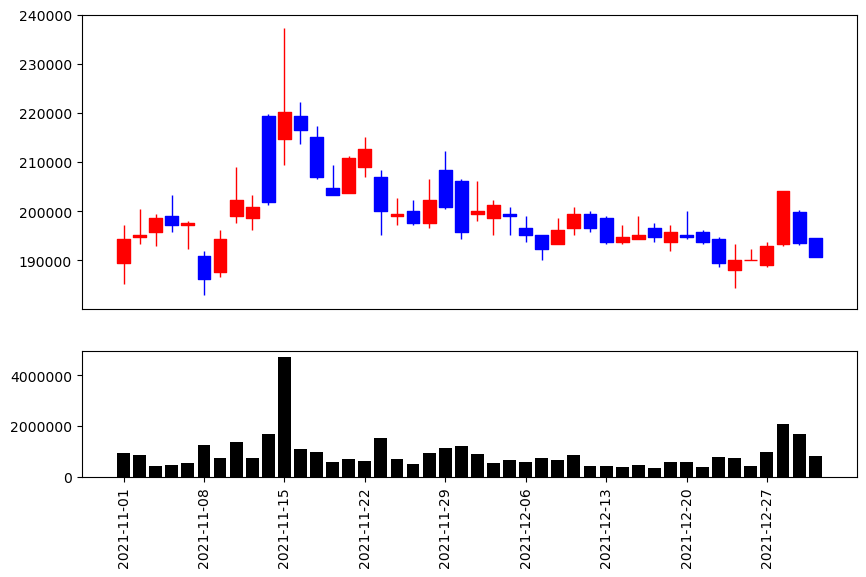

In [8]:
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
 
num_row = 2
gs = GridSpec(num_row, 1, height_ratios=(3.5, 1.5))
 
ax_top = fig.add_subplot(gs[0, :])
draw_candle_chart(range(len(df)), df, ax_top) ## 분봉(캔들) 차트
ax_top.set_xmargin(0.05) ## 좌우 여백 비율
ax_top.set_ymargin(0.05) ## 위아래 여백 비율
ax_top.xaxis.set_visible(False)
 
## 거래량 바 차트
ax_bottom = fig.add_subplot(gs[1, :])
ax_bottom.bar(range(len(df)), df['Volume'], color='k')
ax_bottom.set_yticklabels(['{:.0f}'.format(x) for x in ax_bottom.get_yticks()])
 
xticks = range(len(df))[::5]
xticklabels = [x.strftime('%Y-%m-%d') for x in df.index[::5]]
ax_bottom.set_xticks(xticks)
ax_bottom.set_xticklabels(xticklabels)
ax_bottom.tick_params(axis='x', rotation=90)
plt.show()

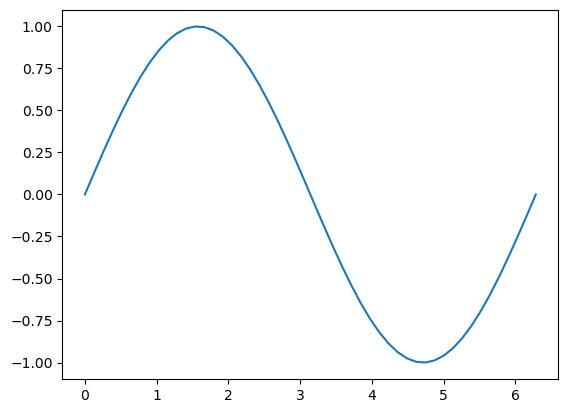

In [9]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

plt.plot(x, y)
plt.show()

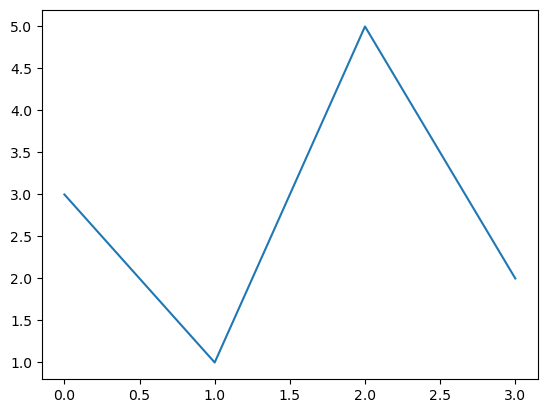

In [10]:
plt.plot([3, 1, 5, 2])
plt.show()

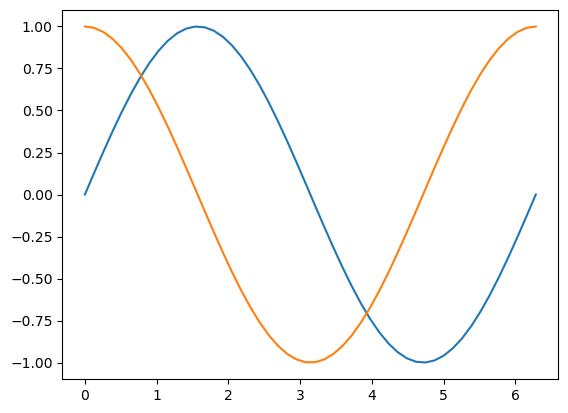

In [11]:
x = np.linspace(0, 2*np.pi, 50)

plt.plot(x, np.sin(x), x, np.cos(x))

plt.show()

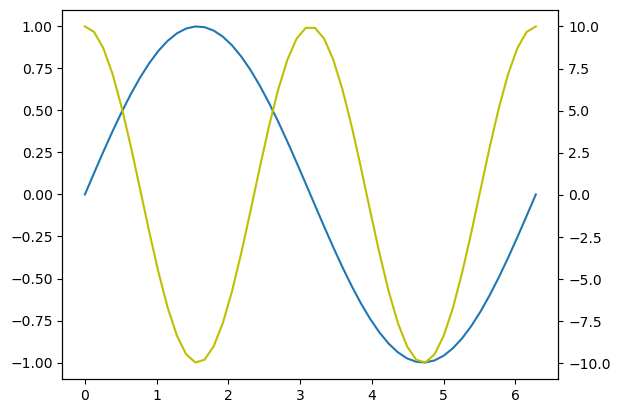

In [12]:
x = np.linspace(0, 2*np.pi, 50)

ax1 = plt.gca()
ax2 = plt.gca().twinx()

ax1.plot(x, np.sin(x))
ax2.plot(x, 10*np.cos(2*x), color='y')

plt.show()

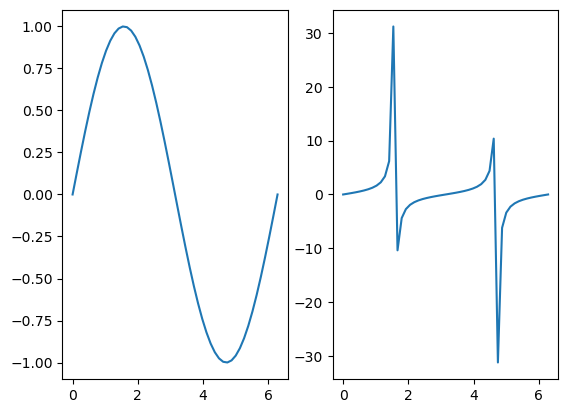

In [13]:
x1 = np.linspace(0, 2*np.pi, 50)
y1 = np.sin(x1)

x2 = np.linspace(0.0, 2*np.pi, 50)
y2 = np.tan(x2)

# 1x2구간으로 나누고 1번째에 그리기
plt.subplot(1, 2, 1)
plt.plot(x1, y1)

# 1x2구간으로 나누고 2번째에 그리기
plt.subplot(1, 2, 2)
plt.plot(x2, y2)

plt.show()

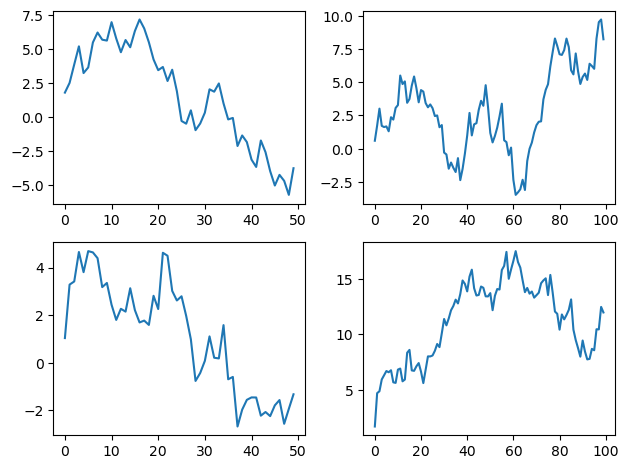

In [14]:
y1 = npr.normal(size = 50).cumsum()
y2 = npr.normal(size = 100).cumsum()
y3 = npr.normal(size = 50).cumsum()
y4 = npr.normal(size = 100).cumsum()



plt.subplot(2, 2, 1)
plt.plot(y1)

# same as plt.subplot(222)
plt.subplot(2, 2, 2)
plt.plot(y2)

# same as plt.subplot(2,2,3)
plt.subplot(223)
plt.plot(y3)

plt.subplot(224)
plt.plot(y4)

plt.tight_layout()
plt.show()

In [15]:
y1

array([ 1.79105429,  2.5038959 ,  3.86215064,  5.19779095,  3.22997534,
        3.64451367,  5.48255375,  6.2148684 ,  5.6868124 ,  5.62174075,
        6.97711964,  5.77767896,  4.76540507,  5.66278827,  5.12995064,
        6.32455005,  7.17443199,  6.51510283,  5.49607625,  4.2337136 ,
        3.44293472,  3.67991251,  2.64685281,  3.47615193,  1.89670471,
       -0.29639101, -0.49600935,  0.48616597, -0.97220083, -0.48350748,
        0.3145697 ,  2.03432447,  1.85999053,  2.46623949,  0.9978825 ,
       -0.18071738, -0.07304535, -2.13784574, -1.36288859, -1.84934152,
       -3.13937497, -3.6795853 , -1.73356845, -2.59273304, -3.98949461,
       -5.04714256, -4.26275366, -4.70401775, -5.73525575, -3.77296344])

In [16]:
a = np.arange(15).reshape(3, 5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [17]:
a = np.arange(8).reshape(2, 4)**2
print(a)
# [[ 0  1  4  9]
#  [16 25 36 49]]

# 모든 요소의 합
print(f"sum : {a.sum()}")
# 140

# 모든 요소 중 최소값
print(f"min : {a.min()}")
# 0

# 모든 요소 중 최대값
print(f"max : {a.max()}")
# 49

# 모든 요소 중 최대값의 인덱스
print(f"argmax : {a.argmax()}")
# 7

# 모든 요소의 누적합
print(f"cumsum : {a.cumsum()}")
# [  0   1   5  14  30  55  91 140]

[[ 0  1  4  9]
 [16 25 36 49]]
sum : 140
min : 0
max : 49
argmax : 7
cumsum : [  0   1   5  14  30  55  91 140]
